(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


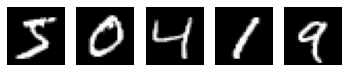

In [4]:
import numpy as np

# Keras has built-in mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot as plt

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

fig = plt.figure()

for i in range(5):
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
 
plt.show()

In [10]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding. See https://keras.io/utils/#to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## 作業

請大家試著用RNN系列模型，努力讓MNIST的 Test accuracy 到達95%以上吧

In [22]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, Dropout

K.clear_session()

model = Sequential()

# add model layer here.
# e.g. model.add(...)

model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 128)           512       
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=16, epochs=5, validation_split=0.2)
print('Test accuracy:', model.evaluate(x_test, y_test)[1])

Epoch 1/5
3000/3000 [==============================] - 44s 15ms/step - loss: 0.6218 - accuracy: 0.8045 - val_loss: 0.2031 - val_accuracy: 0.9373
Epoch 2/5
3000/3000 [==============================] - 45s 15ms/step - loss: 0.2181 - accuracy: 0.9378 - val_loss: 0.1110 - val_accuracy: 0.9688
Epoch 3/5
3000/3000 [==============================] - 46s 15ms/step - loss: 0.1653 - accuracy: 0.9559 - val_loss: 0.1179 - val_accuracy: 0.9648
Epoch 4/5
3000/3000 [==============================] - 45s 15ms/step - loss: 0.1290 - accuracy: 0.9638 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0622 - accuracy: 0.9811
Test accuracy: 0.9811000227928162
